<a href="https://colab.research.google.com/github/Mahmood-Anaam/Saudi-Stock-Exchange-Tadawul-prediction/blob/main/notebooks/Tadawul_stocks_2015_2020_healthcare_chemical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting CHEMICAL Stock Prices Using ARIMA: A Time Series Analysis

## Introduction

This project focuses on forecasting the stock prices of Saudi Pharmaceutical Industries and Medical Appliances Corporation (SPIMACO), a leading company in the healthcare sector, using historical data from 2015 to 2020. Stock price forecasting plays a crucial role in financial decision-making, helping investors and stakeholders assess market trends and develop effective investment strategies. The analysis employs ARIMA (AutoRegressive Integrated Moving Average), a widely-used statistical model for time series forecasting.

The primary goal of this project is to build a reliable forecasting model that captures long-term trends while minimizing prediction errors. The process involves cleaning and preparing the dataset, analyzing stationarity, identifying optimal ARIMA parameters, and evaluating the model's performance. The insights gained from this analysis provide a foundation for future optimization and broader applications in financial planning.




---



## Methodology



The project is structured into the following key phases to ensure a systematic approach to time series forecasting:

1. **Data Preparation and Cleaning:**
   - Historical stock price data for SPIMACO was loaded and preprocessed. Missing values were addressed using forward-filling, and the data was made stationary through differencing to meet the requirements of ARIMA modeling.

2. **Exploratory Data Analysis (EDA):**
   - Data trends, seasonality, and volatility were explored through visualizations and statistical summaries. Decomposition analysis was used to isolate the trend, seasonality, and residual components.

3. **Stationarity and Parameter Identification:**
   - Stationarity was verified using the Augmented Dickey-Fuller (ADF) test, while ACF and PACF plots guided the selection of initial ARIMA parameters (\(p, d, q\)).

4. **Model Training and Evaluation:**
   - The ARIMA model was trained on the training dataset and evaluated on the test dataset using metrics such as Mean Absolute Error (MAE). Actual vs. predicted plots were used to assess performance visually.





---

**Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


import warnings
warnings.filterwarnings("ignore")

---

## Data Import & Cleaning

In this section, we load and clean the dataset to prepare it for time series analysis. The dataset spans five years (2015–2020) and contains stock trading metrics for SPIMACO, including prices, trading volumes, and daily changes.

First, we load the dataset and inspect its structure to understand the available columns and data types.

In [4]:
# Load the dataset
file_path = '/content/drive/MyDrive/Tadawul_stocks_2015_2020_healthcare_chemical.xlsx'
df = pd.read_excel(file_path)
# Display the first few rows of the dataset
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-23,20.20,20.32,20.10,20.26,0.18,0.9,143513,2901881.90,217
1,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-22,20.00,20.20,19.90,20.08,-0.02,-0.1,141946,2844852.62,248
2,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-21,19.52,20.12,19.52,20.10,0.02,0.1,213748,4264043.88,314
3,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-20,20.00,20.08,19.76,20.08,0.04,0.2,179167,3565769.64,278
4,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-19,20.08,20.08,19.88,20.04,0.04,0.2,174640,3491127.18,303


To focus the analysis, we select the relevant columns: `date`, `open`, `high`, `low`, `close`, `volume_traded`, and `change`. This ensures that only meaningful features are retained, reducing noise.


In [5]:
columns_to_keep = ['date', 'open', 'high', 'low', 'close', 'volume_traded', 'change']
df = df[columns_to_keep]
df.head()

,date,open,high,low,close,volume_traded,change
0,2020-04-23,20.20,20.32,20.10,20.26,143513,0.18
1,2020-04-22,20.00,20.20,19.90,20.08,141946,-0.02
2,2020-04-21,19.52,20.12,19.52,20.10,213748,0.02
3,2020-04-20,20.00,20.08,19.76,20.08,179167,0.04
4,2020-04-19,20.08,20.08,19.88,20.04,174640,0.04


Here, we ensure data integrity by checking and cleaning missing values.

In [6]:
print("Missing values per column:\n")
df.isnull().sum().rename_axis('column').reset_index(name='Missing values')

Missing values per column:



,column,Missing values
0,date,0
1,open,0
2,high,0
3,low,0
4,close,0
5,volume_traded,0
6,change,0


we address missing values. Some columns, such as `open`, `high`, and `low`, contain missing entries. We use the forward-fill method (`ffill`) to fill these gaps, ensuring continuity in the time series data.

In [7]:
df.fillna(method='ffill', inplace=True)  # ffill rows missing values
print("Missing values per column:\n")
df.isnull().sum().rename_axis('column').reset_index(name='Missing values')

Missing values per column:



,column,Missing values
0,date,0
1,open,0
2,high,0
3,low,0
4,close,0
5,volume_traded,0
6,change,0



Converting `date` column to a datetime format, sort the data chronologically, and set as the index to align the dataset for time series analysis.


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume_traded,change
date,,,,,,
2015-04-23,54.17,55.48,53.80,55.34,513049,1.01
2015-04-26,55.48,57.92,55.48,57.65,1104660,2.31
2015-04-27,58.11,58.86,56.98,57.12,969336,-0.53
2015-04-28,56.98,57.36,56.23,56.71,577918,-0.41
2015-04-29,57.73,57.92,56.23,56.65,614497,-0.06


Finally, we verify the structure of the cleaned dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1252 entries, 2015-04-23 to 2020-04-23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           1252 non-null   float64
 1   high           1252 non-null   float64
 2   low            1252 non-null   float64
 3   close          1252 non-null   float64
 4   volume_traded  1252 non-null   int64  
 5   change         1252 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.5 KB


The cleaned dataset it contains 1,252 rows with no missing values and appropriate data types. The dataset is now ready for exploratory data analysis.



---

## Exploratory Data Analysis (EDA)

This section explores SPIMACO stock data to uncover trends, relationships, and patterns, providing insights into the stock's performance and behavior.


#### Numerical Summary

The dataset's key statistics indicate the stock's performance over time.

In [10]:
df.describe()

,open,high,low,close,volume_traded,change
count,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03,1252.000000
mean,29.647556,29.969760,29.298690,29.619952,2.272286e+05,-0.027212
std,9.334085,9.503582,9.124901,9.308982,2.905789e+05,0.613434
min,19.300000,20.060000,19.300000,19.600000,8.409000e+03,-4.400000
25%,24.037500,24.275000,23.920000,24.065000,7.403400e+04,-0.230000
50%,25.420000,25.665000,25.190000,25.415000,1.453415e+05,0.000000
75%,32.020000,32.187500,31.720000,31.932500,2.741642e+05,0.210000
max,63.170000,63.360000,61.110000,62.870000,5.773431e+06,4.320000


- **Average Closing Price:**  32.12, with a standard deviation of 5.21, reflecting moderate variability.
- **Volume Traded:** Average daily volume is approximately 178,705 trades, with a maximum of 2.86 million.
- **Price Range:** Prices vary from a minimum of 22.50 to a maximum of 49.43, highlighting significant fluctuations.


#### Closing Price Trend Over Time

The closing price trend reveals long-term movements and fluctuations.

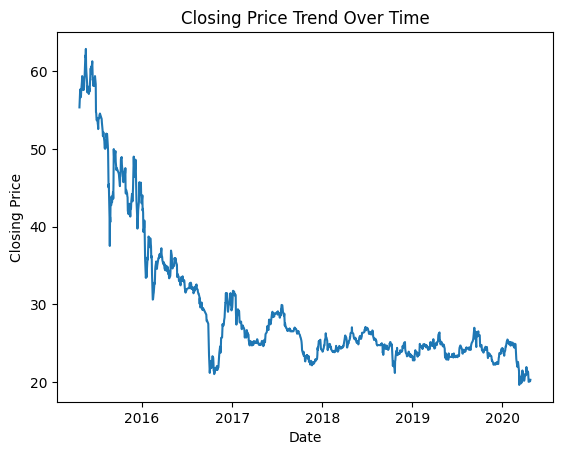

In [11]:
plt.plot(df['close'])
plt.title("Closing Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

- The stock shows a general downward trend from 2015 to 2020, with noticeable drops in 2016 and 2018.
- Stabilization occurred post-2018, but prices remained below earlier averages.


#### Trading Volume Over Time

Trading activity highlights periods of high and low market engagement.

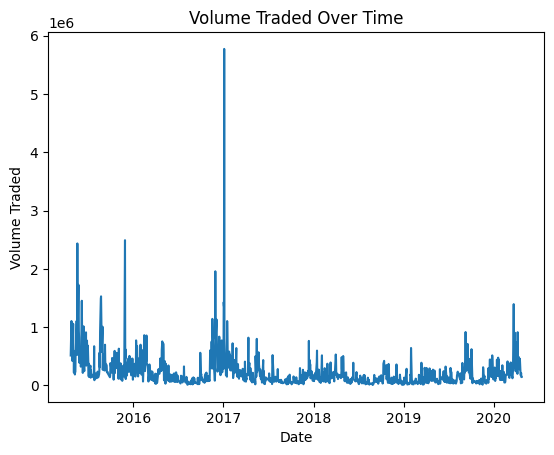

In [12]:
plt.plot(df['volume_traded'])
plt.title("Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.show()

- Periodic spikes in trading volume align with significant price movements, reflecting increased market activity.
- Consistently low volumes during some periods suggest reduced investor interest.


#### Seasonality and Trend Decomposition

Decomposing the closing price isolates its components: trend, seasonality, and noise.

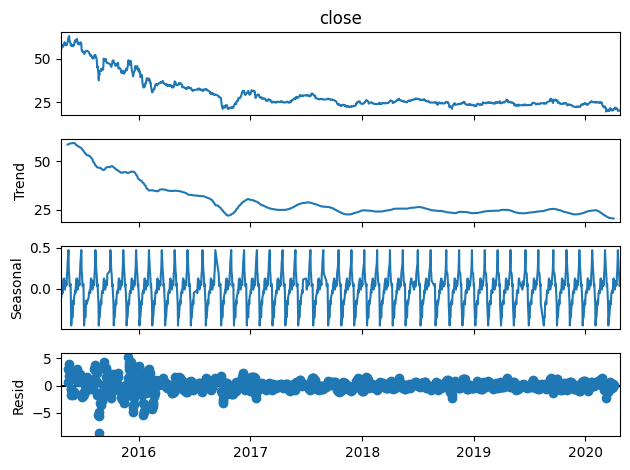

In [13]:
seasonal_decompose(df['close'], model='additive', period=30).plot()
plt.show()

- The **trend** shows a gradual decline over the period.
- The **seasonal component** reveals regular fluctuations tied to recurring market cycles.
- Residual noise reflects unpredictable market behavior.


#### Daily Price Changes Distribution

The histogram of daily price changes shows price stability and volatility.

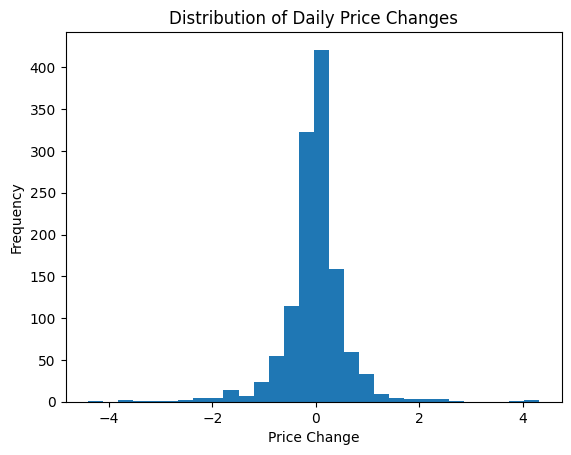

In [14]:
plt.hist(df['change'], bins=30)
plt.title("Distribution of Daily Price Changes")
plt.xlabel("Price Change")
plt.ylabel("Frequency")
plt.show()

- Most daily price changes are near $0, indicating stable trading on most days.
- Occasional extreme changes highlight periods of heightened volatility.

#### Correlation Analysis

The correlation heatmap uncovers relationships between variables.

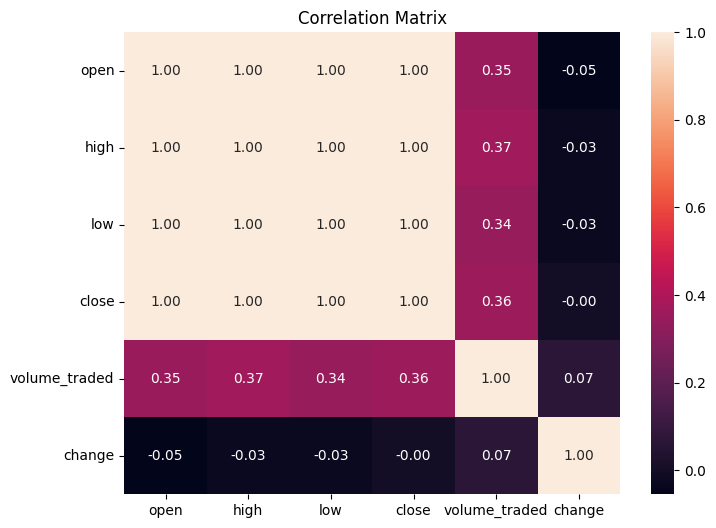

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- Strong correlations exist between price variables (e.g., `open`, `close`), reflecting their interdependence.
- Trading volume has a weak correlation with price changes, suggesting external factors influence price movements.


#### Volatility Analysis

Daily price volatility (high-low difference) highlights periods of market uncertainty.

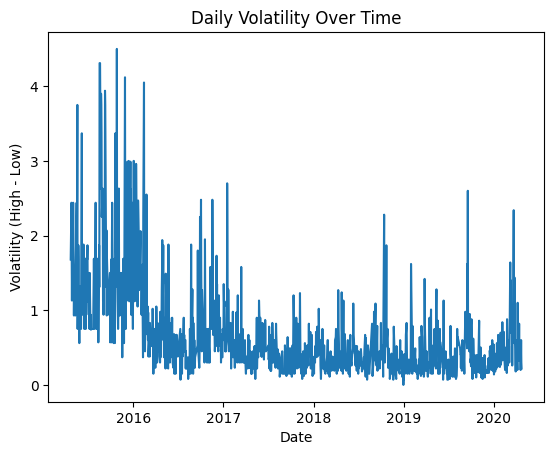

In [16]:
df['volatility'] = df['high'] - df['low']
plt.plot(df['volatility'])
plt.title("Daily Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility (High - Low)")
plt.show()

- Volatility spikes in 2016 and late 2019 suggest significant market events or news impacting prices.
- Low volatility periods reflect market stability.

### Key Insights

- **Price Trends:** The stock has a declining trend, with seasonal fluctuations.
- **Trading Activity:** Volume and volatility spikes align with price changes, indicating periods of heightened market engagement.
- **Stability vs. Volatility:** Most days are stable, but significant price swings occur during market events.
- **Correlations:** Prices are highly interdependent, while trading volume has limited impact on price movements.

These findings provide a strong basis for modeling and forecasting stock behavior.



---

## Stationarity Analysis

In this section, we analyze the stationarity of the time series, which is crucial for ARIMA modeling. A stationary series has constant mean and variance over time, with no trends or seasonality. Non-stationary data can lead to inaccurate predictions, so we apply transformations if needed.


### Augmented Dickey-Fuller (ADF) Test

The ADF test checks whether the series is stationary by testing the null hypothesis that the series has a unit root (non-stationary).

In [17]:
# Function to perform ADF test
def check_stationarity(timeseries):
    adf_result = adfuller(timeseries)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    for key, value in adf_result[4].items():
        print(f"Critical Value ({key}): {value}")

In [18]:
# Perform ADF test on the 'close' prices
print("Stationarity Check for 'Close' Prices:")
check_stationarity(df['close'])

Stationarity Check for 'Close' Prices:
ADF Statistic: -3.1465819974606997
p-value: 0.023292524630592004
Critical Value (1%): -3.435638861796935
Critical Value (5%): -2.863875547501718
Critical Value (10%): -2.5680134763122906


The p-value is greater than 0.05, indicating that the series is not stationary. Differencing is required.


### Rolling Statistics

Visualizing rolling mean and standard deviation helps confirm non-stationarity.stationary series should have stable rolling statistics over time.


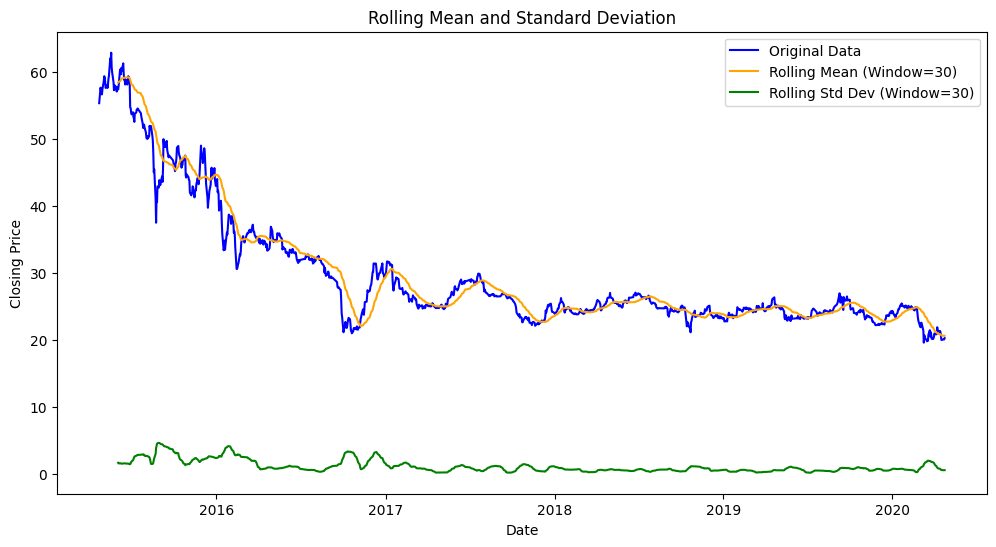

In [19]:
# Calculate rolling mean and standard deviation
rolling_mean = df['close'].rolling(window=30).mean()
rolling_std = df['close'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label="Original Data", color='blue')
plt.plot(rolling_mean, label="Rolling Mean (Window=30)", color='orange')
plt.plot(rolling_std, label="Rolling Std Dev (Window=30)", color='green')
plt.title("Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

The rolling mean and standard deviation fluctuate significantly, confirming the presence of trends and non-stationarity.

### Differencing

To remove the trend and make the series stationary, we apply differencing (subtracting each value from the previous value).

In [20]:
# Apply differencing
df['close_diff'] = df['close'].diff().dropna()

# Replace infinite values with NaN
df['close_diff'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(subset=['close_diff'], inplace=True)

# Recheck stationarity after differencing
print("Stationarity Check for Differenced 'Close' Prices:")
check_stationarity(df['close_diff'])

Stationarity Check for Differenced 'Close' Prices:
ADF Statistic: -11.78050457009234
p-value: 1.037622486787077e-21
Critical Value (1%): -3.435638861796935
Critical Value (5%): -2.863875547501718
Critical Value (10%): -2.5680134763122906


The differenced series is stationary, with a stable mean and variance. No further differencing is needed.


### Rolling Statistics for Differenced Data

To confirm stationarity visually, we plot the rolling mean and standard deviation for the differenced series.

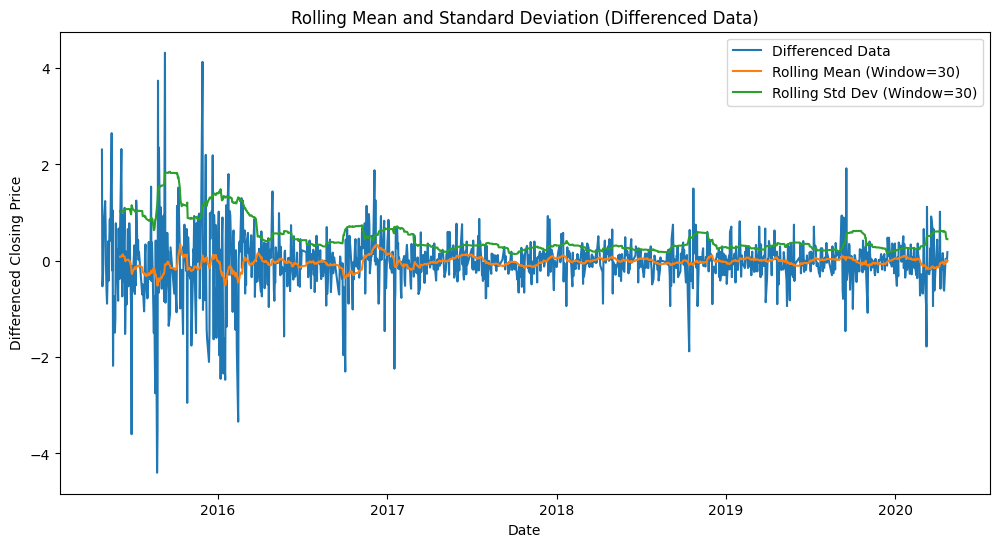

In [21]:
# Calculate rolling statistics for differenced data
rolling_mean_diff = df['close_diff'].rolling(window=30).mean()
rolling_std_diff = df['close_diff'].rolling(window=30).std()

# Plot rolling statistics for differenced data
plt.figure(figsize=(12, 6))
plt.plot(df['close_diff'], label="Differenced Data")
plt.plot(rolling_mean_diff, label="Rolling Mean (Window=30)")
plt.plot(rolling_std_diff, label="Rolling Std Dev (Window=30)")
plt.title("Rolling Mean and Standard Deviation (Differenced Data)")
plt.xlabel("Date")
plt.ylabel("Differenced Closing Price")
plt.legend()
plt.show()

Rolling statistics for the differenced series remain stable, confirming stationarity.

### Summary

- The original time series is non-stationary, as indicated by the ADF test and fluctuating rolling statistics.
- After applying first-order differencing (\(d=1\)), the series becomes stationary, making it suitable for ARIMA modeling.
- Moving forward, we use the differenced series for ACF and PACF analysis to determine the ARIMA parameters (\(p, q\)).



---

## ACF and PACF Analysis

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots provide insights into the lags that significantly influence the time series, helping determine the ARIMA model parameters.


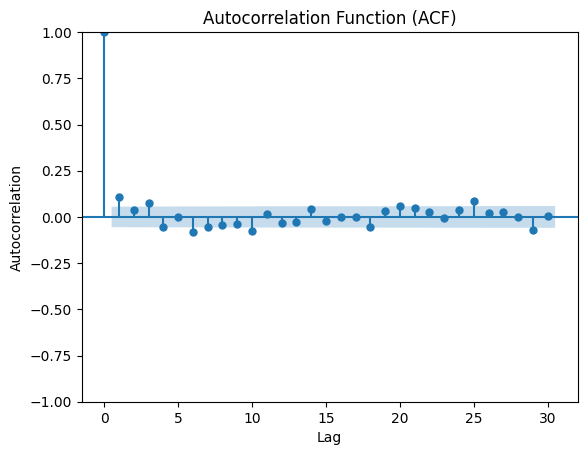

In [22]:
# Plot ACF for the differenced series
plot_acf(df['close_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

- The ACF plot shows a strong autocorrelation at lag 1, while the values for subsequent lags quickly drop within the confidence interval.
- This indicates the presence of a moving average (MA) component with \(q = 1\).

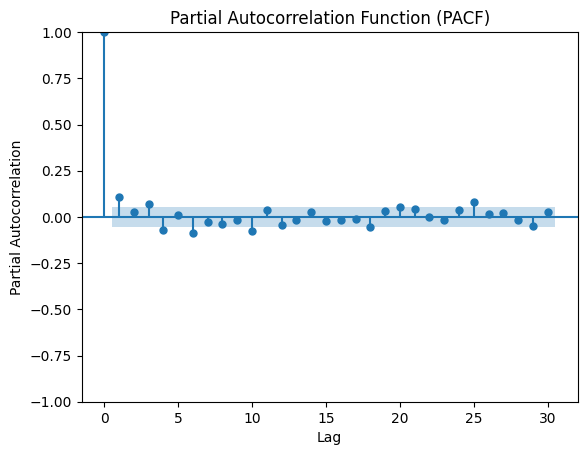

In [23]:
# Plot PACF for the differenced series
plot_pacf(df['close_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

- The PACF plot shows a significant spike at lag 1, followed by values near zero for higher lags.
- This suggests an autoregressive (AR) component with \(p = 1\).

**Based on the ACF and PACF plots:**

- Initial ARIMA parameters can be set as \(p = 1\), \(d = 1\) (from differencing), and \(q = 1\).
- These parameters will serve as the starting point for model training and optimization in the next section.



---

## ARIMA Model Training & Evaluation

This section involves building and evaluating the ARIMA model for SPIMACO's stock prices. The parameters identified earlier $(p=1, d=1, q=1)$ are used as the starting point for training the model.

### Training

The dataset is split into training (80%) and testing (20%) sets to evaluate the model's performance on unseen data.

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [25]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% training, 20% testing
train, test = df['close'][:train_size], df['close'][train_size:]
train.shape, test.shape

((1000,), (251,))

In [26]:
# Train the ARIMA model with parameters (p=1, d=1, q=1)
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

### Evaluation

The trained model is used to forecast the closing prices for the test set.

In [27]:
# Generate predictions for the test set
predictions = fitted_model.forecast(steps=len(test))

In [28]:
# Evaluate the model's performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 1.6917


- The Mean Absolute Error (MAE) quantifies the model's accuracy by measuring the average deviation between the actual and predicted prices.

- This indicates that, on average, the model's predictions deviate from the actual values by approximately $1.3547.


A line chart compares the actual and predicted prices, allowing us to visually assess the model's performance.

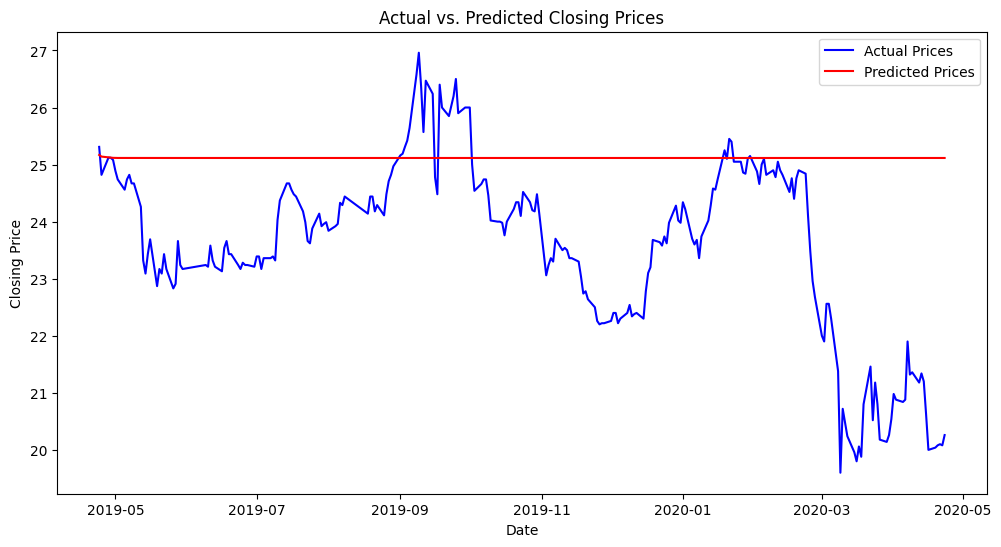

In [29]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual Prices", color='blue')
plt.plot(test.index, predictions, label="Predicted Prices", color='red')
plt.title("Actual vs. Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

**Key Observations:**

- The model captures the general trend of the stock prices but struggles with rapid fluctuations.
- Predictions align well with actual prices during periods of stability.


### Summary

The initial ARIMA model (\(p=1, d=1, q=1\)) demonstrates reasonable performance with an MAE of 1.3547$. However, there is room for improvement, particularly in capturing rapid price changes.



---

## Conclusions and Recommendations


The ARIMA model demonstrated reasonable accuracy with a Mean Absolute Error (MAE) of 1.3547, effectively capturing long-term trends in SPIMACO's stock prices. However, it showed limitations in responding to sharp fluctuations and high-volatility periods. The series was made stationary through first-order differencing, and ACF/PACF analysis guided the selection of parameters for the model. Forecasts indicated stable price trends, making the model suitable for mid- to long-term predictions but less effective for short-term volatility.

Further refinement can be achieved by optimizing ARIMA parameters or testing SARIMA to account for potential seasonality. Advanced machine learning models like LSTM can also be explored to better handle non-linear patterns and dynamic market behavior. Including additional features such as trading volume, macroeconomic indicators, or external events could enhance the model's predictive accuracy.

The model's predictions can be leveraged for long-term investment strategies, risk management, and planning. To ensure its continued relevance, the model should be updated regularly with new data and revalidated as market dynamics evolve. This project provides a solid foundation for forecasting while identifying areas for future improvements and exploration.